**Análise e tratamento de Imagens e Vídeos Digitais**
> **Professora: Sthefanie Passo** 

## **Transformadas Radiométricas**

### Transformadas Radiométricas
>- São projetadas para manipular a imagem com
base em características psicofísicas do SVH.
>- Podem distorcer a imagem através de dois
processos:

>1) retirar informações não relevantes.

>2) realçar certas características de interesse.

>- Expansão de contraste (retira)
>- Uniformização dos níveis de cinza (realça)
>- Remoção de ruído – suavização (retira)
>- Realce de bordas ou contornos de objetos
(realça)
>- Supressão de informação não desejada (retira)
>- Pseudo-coloração (realça)

### Filtragem
>- Principal aplicação é a eliminação de ruídos
>- Também serve de pré-processamento da
imagem para outras aplicações

> Exemplos de abordagens:
>- Domínio Espacial
>- Domínio da Frequência
>- Filtros “passa-alta”
>- Filtros “passa-baixa”

### Filtros “passa-alta”
>- realça os detalhes, produzindo uma
"agudização" (“sharperning”) da imagem

>- as transições entre regiões diferentes tornam-
se mais nítidas

>- realça certas características da imagem, como
bordas, linhas curvas ou manchas
>- Pode causar o efeito indesejado de enfatizar
um ruído, porventura existente na imagem

![texto do link](https://www.researchgate.net/profile/Julio-Cesar-Da-Silva-2/publication/313832176/figure/fig5/AS:463137066491904@1487431889020/Figura-7-Imagens-obtidas-de-filtros-passa-alta-O-filtro-Sobel-de-passa-alta-utiliza.png)


###Filtros “passa-baixa”
>- o efeito visual é o de suavização da imagem
>- redução do número de níveis de cinza da
cena
>- altas freqüências, que correspondem às
transições abruptas são atenuadas
>- tende a minimizar ruídos e apresenta o efeito
de borramento da imagem

![texto do link](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4plbl16yB9jhYGLU-D8hYRlBySmCTTC7q5yrLFd6QXjpIAhS8mCcyxnxMW8nY1FRm_N0&usqp=CAU)

In [ ]:
#Bibliotecas para tratamento de imagens digitais
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg
import random


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf_device="GPU:0"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2010076827505221458
]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path_modelo = "gdrive/My Drive/Profissional/4. PLANEJAMENTO/08 - Análise e tratamento de Imagens e Vídeos Digitais/"

In [ ]:
!ls gdrive/My\ \Drive/Profissional/4.\ \PLANEJAMENTO/08\ \-\ \Análise\ \e\ \tratamento\ \de\ \Imagens\ \e\ \Vídeos\ \Digitais

'1 - Imagem'			       '4 - Transformadas Radiométricas'
'1 - Imagem (arquivo auxiliar).gdraw'  '5 - Dataframes'
'2 - Sistema de Cores.ipynb'	       '6 - Trabalho Final'
'3 - Histograma'		        Lenna.png


In [ ]:
def ruidoPimenta(img,tipo=0):
    for i in range(0, len(img)):
        for j in range(0, len(img[1])):
            r = random.randint(10,20)
            if (r==12):# or img[i][j-1]==img[i][j]):
                img[i][j] = 0    
    return img

def denoise(img, weight=0.1, eps=1e-3, num_iter_max=200):
    
    u = np.zeros_like(img)
    px = np.zeros_like(img)
    py = np.zeros_like(img)
    
    nm = np.prod(img.shape[:2])
    tau = 0.125
    
    i = 0
    while i < num_iter_max:
        u_old = u
        
        # x and y components of u's gradient
        ux = np.roll(u, -1, axis=1) - u
        uy = np.roll(u, -1, axis=0) - u
        
        # update the dual variable
        px_new = px + (tau / weight) * ux
        py_new = py + (tau / weight) * uy
        norm_new = np.maximum(1, np.sqrt(px_new **2 + py_new ** 2))
        px = px_new / norm_new
        py = py_new / norm_new

        # calculate divergence
        rx = np.roll(px, 1, axis=1)
        ry = np.roll(py, 1, axis=0)
        div_p = (px - rx) + (py - ry)
        
        # update image
        u = img + weight * div_p
        
        # calculate error
        error = np.linalg.norm(u - u_old) / np.sqrt(nm)
        
        if i == 0:
            err_init = error
            err_prev = error
        else:
            # break if error small enough
            if np.abs(err_prev - error) < eps * err_init:
                break
            else:
                e_prev = error
                
        # don't forget to update iterator
        i += 1

    return u

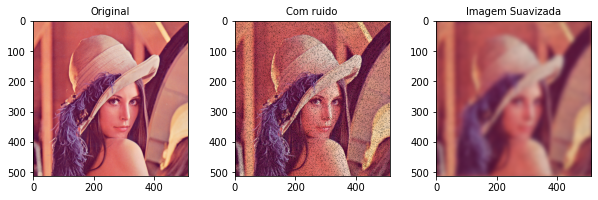

In [ ]:
if __name__ == "__main__":
    
    # carrega-se a imagem
    img = mpimg.imread(path_modelo+'/Lenna.png')
    
    # adiciona ruido à imagem
    img_ruido = ruidoPimenta(mpimg.imread(path_modelo+'/Lenna.png'))
    
    # imagem suavizada
    imagem_suavizada = denoise(img_ruido, weight=15)
    
    # mostra todas as imagens para efeito de comparação
    fig = plt.figure(figsize=[10,10])
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    # mostra a imagem original
    ax = fig.add_subplot(2, 3, 1)
    # plt.subplot(121)
    ax.imshow(img,cmap = 'gray')
    ax.set_title('Original', fontsize=10)
    
    # mostra a imagem com ruido
    ax = fig.add_subplot(2, 3, 2)
    # plt.subplot(121)
    ax.imshow(img_ruido, cmap = 'gray')
    ax.set_title('Com ruido', fontsize=10)
    
    # mostra a imagem suavizada
    ax = fig.add_subplot(2, 3, 3)
    ax.imshow(imagem_suavizada, cmap = 'gray')
    ax.set_title('Imagem Suavizada', fontsize=10)

### Detecção de Bordas
>- Métodos de realce / limiar
(“enhancement / thresholding”)
>- operadores diferenciais
>- operadores direcionais
>- Métodos de adaptação de bordas (“edge
fitting”)
![texto do link](https://www.researchgate.net/profile/Andrey-Kuehlkamp-2/publication/283015224/figure/fig18/AS:668780292239371@1536461055400/Figura-5-Deteccao-de-bordas-em-uma-imagem-a-imagem-original-b-deteccao-de-bordas.jpg)

###Técnicas de detecção de bordas
>- Gradiente de Roberts
>- Operador de Sobel
>- Operador de Prewitt
>- Operador de Robinson
>- Operador Laplaciano
>- Algoritmo de Canny
>- Operador Marr-Hildreth